In [1]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\souna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\souna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\souna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\souna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\souna\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [2]:
import pandas as pd

In [3]:
import string

In [4]:
from nltk.corpus import stopwords

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
data = pd.read_csv('train_snli.txt', sep='\t')
# 1 represents plagiarised texts 
# 0 represents non-plagiarised texts
data.head()

,A person on a horse jumps over a broken down airplane.,"A person is at a diner, ordering an omelette.",0
0,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
1,Children smiling and waving at camera,There are children present,1
2,Children smiling and waving at camera,The kids are frowning,0
3,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0
4,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,1


In [9]:
data.columns = ["source_text", "plagiarized_text", "label"]
data.head()

,source_text,plagiarized_text,label
0,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
1,Children smiling and waving at camera,There are children present,1
2,Children smiling and waving at camera,The kids are frowning,0
3,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0
4,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,1


In [10]:
data['label'].value_counts()

label
0    183965
1    183407
Name: count, dtype: int64

In [11]:
#input feature
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Convert to lowercase
    text = text.lower()
    #remove stopwords
    stop_words=set(stopwords.words('english'))
    text= " ".join(word for word in text.split() if word not in stop_words)
    return text
    
# Test the function
result = preprocess_text("EVERYTHING #####&&&(*)() IS SAMPLE ")
print(result)

everything sample


In [12]:
data['source_text']=data['source_text'].apply(preprocess_text)

In [13]:
data.head()

,source_text,plagiarized_text,label
0,person horse jumps broken airplane,"A person is outdoors, on a horse.",1
1,children smiling waving camera,There are children present,1
2,children smiling waving camera,The kids are frowning,0
3,boy jumping skateboard middle red bridge,The boy skates down the sidewalk.,0
4,boy jumping skateboard middle red bridge,The boy does a skateboarding trick.,1


In [14]:
print(data.isnull().sum())
data.dropna(inplace=True)
print(data.isnull().sum())

source_text         0
plagiarized_text    4
label               0
dtype: int64
source_text         0
plagiarized_text    0
label               0
dtype: int64


In [15]:
#vectorization
tfidf_vectorizer=TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['source_text']+data['plagiarized_text'])


In [16]:
#save vectorization as .pkl
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

print("tfidf_vectorizer saved as tfidf_vectorizer.pkl")


tfidf_vectorizer saved as tfidf_vectorizer.pkl


In [17]:
y=data['label']

In [18]:
# split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
#logisticR
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("Classification",classification_report(y_test,y_pred))
print("Confusion",confusion_matrix(y_test,y_pred))

accuracy 0.701145983613251
Classification               precision    recall  f1-score   support

           0       0.72      0.67      0.69     36837
           1       0.69      0.73      0.71     36637

    accuracy                           0.70     73474
   macro avg       0.70      0.70      0.70     73474
weighted avg       0.70      0.70      0.70     73474

Confusion [[24702 12135]
 [ 9823 26814]]


c:\Users\souna\OneDrive\Desktop\plagirism-detector\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


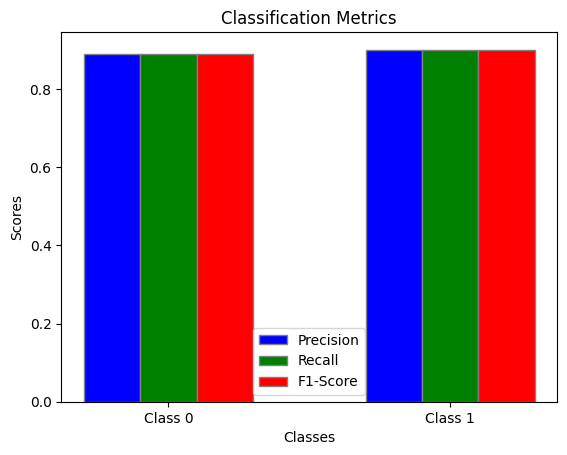

In [20]:
#plotting precision F1 score Recall

import matplotlib.pyplot as plt
import numpy as np

# Metrics
classes = ['Class 0', 'Class 1']
precision = [0.89, 0.90]
recall = [0.89, 0.90]
f1_score = [0.89, 0.90]

# Bar width and positions
bar_width = 0.2
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')

# Customizations
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Metrics')
plt.xticks([r + bar_width for r in range(len(classes))], classes)
plt.legend()
plt.show()


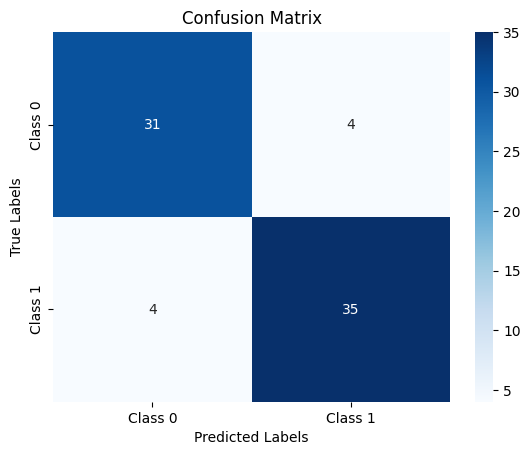

In [21]:
#plotting matrix graph
import seaborn as sns

# Confusion matrix data
cm = [[31, 4],
      [4, 35]]

# Heatmap plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [22]:
#random forest

from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100,random_state=42,criterion="gini",max_depth=50)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("Classification",classification_report(y_test,y_pred))
print("Confusion",confusion_matrix(y_test,y_pred))


accuracy 0.6976209271306857
Classification               precision    recall  f1-score   support

           0       0.72      0.64      0.68     36837
           1       0.68      0.76      0.71     36637

    accuracy                           0.70     73474
   macro avg       0.70      0.70      0.70     73474
weighted avg       0.70      0.70      0.70     73474

Confusion [[23559 13278]
 [ 8939 27698]]


In [22]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("Classification",classification_report(y_test,y_pred))
print("Confusion",confusion_matrix(y_test,y_pred))

accuracy 0.6514277159267223
Classification               precision    recall  f1-score   support

           0       0.66      0.64      0.65     36837
           1       0.65      0.67      0.66     36637

    accuracy                           0.65     73474
   macro avg       0.65      0.65      0.65     73474
weighted avg       0.65      0.65      0.65     73474

Confusion [[23495 13342]
 [12269 24368]]


In [23]:
from sklearn.svm import LinearSVC

# Support Vector Classifier with linear kernel

model = LinearSVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("Classification", classification_report(y_test, y_pred))
print("Confusion", confusion_matrix(y_test, y_pred))

accuracy 0.6919998911179465
Classification               precision    recall  f1-score   support

           0       0.71      0.66      0.68     36837
           1       0.68      0.73      0.70     36637

    accuracy                           0.69     73474
   macro avg       0.69      0.69      0.69     73474
weighted avg       0.69      0.69      0.69     73474

Confusion [[24183 12654]
 [ 9976 26661]]


# CHOOSE MODEL

In [24]:
#logisticR
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("Classification",classification_report(y_test,y_pred))
print("Confusion",confusion_matrix(y_test,y_pred))

accuracy 0.701145983613251
Classification               precision    recall  f1-score   support

           0       0.72      0.67      0.69     36837
           1       0.69      0.73      0.71     36637

    accuracy                           0.70     73474
   macro avg       0.70      0.70      0.70     73474
weighted avg       0.70      0.70      0.70     73474

Confusion [[24702 12135]
 [ 9823 26814]]


c:\Users\souna\OneDrive\Desktop\plagirism-detector\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
import pickle

# Save the model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as model.pkl")



Model saved as model.pkl


# LOAD MODEL AND VECTORIZER

In [26]:
model=pickle.load(open('model.pkl','rb'))
tfidf_vectorizer=pickle.load(open('tfidf_vectorizer.pkl','rb'))


# DETECTION SYSTEM

In [29]:
def detect(input_text):
    #vectorize the text
    vectorized_text=tfidf_vectorizer.transform([input_text])
    #prediction by model
    result=model.predict(vectorized_text)
    return  "PLAGIARISM DETECTED" if result[0]==1 else "NO PLAGIARISM"

In [30]:
#example
input_text="I have no book"
detect(input_text)

'NO PLAGIARISM'

In [31]:
#example
input_text="Playing Musical instruments enhances creativity"
detect(input_text)

'PLAGIARISM DETECTED'